In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from IPython.display import display

Create a chart table

In [2]:
# 2. find url and store it in a variable
url = "https://www.offiziellecharts.de/charts/single/for-date-1651096800000"

In [3]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [4]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# 4.2. check that the html code looks like it should
soup

<!DOCTYPE html>

<html class="no-js" lang="de-de" prefix="og: http://ogp.me/ns#" xml:lang="de-de" xmlns="http://www.w3.org/1999/xhtml">
<meta content="Hier gibt’s die Offiziellen Deutschen Charts in ihrer ganzen Vielfalt. Denn: Hier zählt die Musik." name="description"/>
<head>
<script type="text/javascript">  (function(){   function blockCookies(disableCookies, disableLocal, disableSession){   if(disableCookies == 1){   if(!document.__defineGetter__){   Object.defineProperty(document, 'cookie',{   get: function(){ return ''; },   set: function(){ return true;}   });   }else{   var oldSetter = document.__lookupSetter__('cookie');   if(oldSetter) {   Object.defineProperty(document, 'cookie', {   get: function(){ return ''; },   set: function(v){   if(v.match(/reDimCookieHint\=/)) {   oldSetter.call(document, v);   }   return true;   }   });   }   }   var cookies = document.cookie.split(';');   for (var i = 0; i < cookies.length; i++) {   var cookie = cookies[i];   var pos = cookie.index

In [6]:
# 5. retrieve/extract the desired info
soup.select("body > main > div.container > div > div.col-md-8 > div:nth-child(5) > div > table")


[<table class="table chart-table">
 <tr class="drill-down-link">
 <td class="ch-pos">
 <a class="drill-down" href="/titel-details-2265703"></a>
 <span class="this-week">1</span>
 </td>
 <td class="ch-trend">
 <span class="last-week">
                                         3                                    </span>
 <i class="trend-up"></i> </td>
 <td class="ch-cover">
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2265703_s.jpg') top left no-repeat;"></span>
 </td>
 <td class="ch-info">
 <div class="wrap">
 <span class="info-artist">Harry Styles</span>
 <span class="info-title">As It Was</span>
 <span class="info-label">Columbia</span>
 <span class="play-media">
 <span class="plus-data">
                                                     In Charts: <b>3                                                        W</b>
 </span>
 <span class="plus-data">
                                                     Peak: <b>1</b>
 </span>
 <!-- -->
 <span cl

In [7]:
soup.select("table") # all the info about all chart songs

[<table class="table chart-table">
 <tr class="drill-down-link">
 <td class="ch-pos">
 <a class="drill-down" href="/titel-details-2265703"></a>
 <span class="this-week">1</span>
 </td>
 <td class="ch-trend">
 <span class="last-week">
                                         3                                    </span>
 <i class="trend-up"></i> </td>
 <td class="ch-cover">
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2265703_s.jpg') top left no-repeat;"></span>
 </td>
 <td class="ch-info">
 <div class="wrap">
 <span class="info-artist">Harry Styles</span>
 <span class="info-title">As It Was</span>
 <span class="info-label">Columbia</span>
 <span class="play-media">
 <span class="plus-data">
                                                     In Charts: <b>3                                                        W</b>
 </span>
 <span class="plus-data">
                                                     Peak: <b>1</b>
 </span>
 <!-- -->
 <span cl

In [8]:
soup.select("table span") # all elements containing song info

[<span class="this-week">1</span>,
 <span class="last-week">
                                         3                                    </span>,
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2265703_s.jpg') top left no-repeat;"></span>,
 <span class="info-artist">Harry Styles</span>,
 <span class="info-title">As It Was</span>,
 <span class="info-label">Columbia</span>,
 <span class="play-media">
 <span class="plus-data">
                                                     In Charts: <b>3                                                        W</b>
 </span>
 <span class="plus-data">
                                                     Peak: <b>1</b>
 </span>
 <!-- -->
 <span class="play-video video-more" data-target="https://www.youtube.com/embed/H5v3kku4y6Q"><i class="glyphicon glyphicon-film"></i></span> </span>,
 <span class="plus-data">
                                                     In Charts: <b>3                                     

In [9]:
# we can use .get_text() to extract the content of the tags we selected
# we'll need to do it to each tag with a for loop: here we do it to the first one
soup.select("table span")[3].get_text()

'Harry Styles'

In [10]:
# artist:
# we can access attributes as key-value pairs of dictionaries: using ["key"] to get the value:
soup.select("table span")[3]["class"]

['info-artist']

In [11]:
# title
soup.select("table span")[4].get_text()

'As It Was'

In [12]:
soup.select("table span")[4]["class"]

['info-title']

In [13]:
artist = []
for span in soup.find_all('span', attrs={'class':'info-artist'}):
    artist.append(span.get_text())

In [14]:
title = []
for span in soup.find_all('span', attrs={'class':'info-title'}):
    title.append(span.get_text())

In [15]:
charts = pd.DataFrame({"artist":artist,
                       "title":title})

In [16]:
charts

,artist,title
0,Harry Styles,As It Was
1,Jack Harlow,First Class
2,Rammstein,Zick zack
3,Miksu / MacLoud & T-Low,Sehnsucht
4,Glass Animals,Heat Waves
...,...,...
95,Art [DE],Belgisches Viertel
96,Pashanim,Paris Freestyle
97,Gabry Ponte x LUM!X x Prezioso,Thunder
98,atb x Topic x A7S,Your Love (9PM)


Songpicker Input

In [17]:
songpicker = input("enter a song name")

if songpicker in list(charts['title']):
    print("You choose:")
    display(charts.loc[lambda charts: charts['title'] == songpicker])
    print("We recommend:")
    display(charts.sample())
else:
    print("no recommendation")

You choose:


,artist,title
78,Rammstein,Zeit


We recommend:


,artist,title
15,Jaymes Young,Infinity


Expand the project

In [18]:
url2 = "https://www.offiziellecharts.de/charts/single-jahr"

In [19]:
response2 = requests.get(url2)
response2.status_code

200

In [20]:
soup2 = BeautifulSoup(response2.content, "html.parser")

In [21]:
soup2

<!DOCTYPE html>

<html class="no-js" lang="de-de" prefix="og: http://ogp.me/ns#" xml:lang="de-de" xmlns="http://www.w3.org/1999/xhtml">
<meta content="Hier gibt’s die Offiziellen Deutschen Charts in ihrer ganzen Vielfalt. Denn: Hier zählt die Musik." name="description"/>
<head>
<script type="text/javascript">  (function(){   function blockCookies(disableCookies, disableLocal, disableSession){   if(disableCookies == 1){   if(!document.__defineGetter__){   Object.defineProperty(document, 'cookie',{   get: function(){ return ''; },   set: function(){ return true;}   });   }else{   var oldSetter = document.__lookupSetter__('cookie');   if(oldSetter) {   Object.defineProperty(document, 'cookie', {   get: function(){ return ''; },   set: function(v){   if(v.match(/reDimCookieHint\=/)) {   oldSetter.call(document, v);   }   return true;   }   });   }   }   var cookies = document.cookie.split(';');   for (var i = 0; i < cookies.length; i++) {   var cookie = cookies[i];   var pos = cookie.index

In [22]:
soup2.select("body > main > div.container > div > div.col-md-8 > div:nth-child(5) > div > table")

[<table class="table chart-table">
 <tr class="drill-down-link">
 <td class="ch-pos">
 <a class="drill-down" href="/titel-details-2145979"></a>
 <span class="this-week">1</span>
 </td>
 <td class="ch-cover">
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2145979_s.jpg') top left no-repeat;"></span>
 </td>
 <td class="ch-info year-mode">
 <div class="wrap">
 <span class="info-artist">Nathan Evans</span>
 <span class="info-title">Wellerman</span>
 <span class="info-label">Polydor</span>
 <span class="play-media">
 <!--<i class="off glyphicon glyphicon-headphones"></i>-->
 <!-- -->
 </span>
 </div>
 </td>
 </tr>
 <tr class="drill-down-link">
 <td class="ch-pos">
 <a class="drill-down" href="/titel-details-2195739"></a>
 <span class="this-week">2</span>
 </td>
 <td class="ch-cover">
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2195739_s.jpg') top left no-repeat;"></span>
 </td>
 <td class="ch-info year-mode">
 <d

In [23]:
artist1 = []
for span in soup2.find_all('span', attrs={'class':'info-artist'}):
    artist1.append(span.get_text())

In [24]:
title1 = []
for span in soup2.find_all('span', attrs={'class':'info-title'}):
    title1.append(span.get_text())

In [25]:
charts1 = pd.DataFrame({"artist":artist1,
                        "title":title1})

In [26]:
charts1

,artist,title
0,Nathan Evans,Wellerman
1,Ed Sheeran,Bad Habits
2,Tiësto,The Business
3,Riton x Nightcrawlers feat. Mufasa & Hypeman,Friday (Dopamine Re-Edit)
4,The Weeknd,Save Your Tears
...,...,...
95,Helene Fischer feat. Luis Fonsi,Vamos a marte
96,HBz,King Kong
97,Internet Money & Gunna feat. Don Toliver & Nav,Lemonade
98,Melanie Thornton,Wonderful Dream (Holidays Are Coming)


In [27]:
charts = pd.concat([charts, charts1], axis=0)

In [28]:
charts

,artist,title
0,Harry Styles,As It Was
1,Jack Harlow,First Class
2,Rammstein,Zick zack
3,Miksu / MacLoud & T-Low,Sehnsucht
4,Glass Animals,Heat Waves
...,...,...
95,Helene Fischer feat. Luis Fonsi,Vamos a marte
96,HBz,King Kong
97,Internet Money & Gunna feat. Don Toliver & Nav,Lemonade
98,Melanie Thornton,Wonderful Dream (Holidays Are Coming)


In [29]:
charts = charts.drop_duplicates()

In [30]:
charts

,artist,title
0,Harry Styles,As It Was
1,Jack Harlow,First Class
2,Rammstein,Zick zack
3,Miksu / MacLoud & T-Low,Sehnsucht
4,Glass Animals,Heat Waves
...,...,...
95,Helene Fischer feat. Luis Fonsi,Vamos a marte
96,HBz,King Kong
97,Internet Money & Gunna feat. Don Toliver & Nav,Lemonade
98,Melanie Thornton,Wonderful Dream (Holidays Are Coming)


In [31]:
songpicker = input("enter a song name")

if songpicker in list(charts['title']):
    print("You choose:")
    display(charts.loc[lambda charts: charts['title'] == songpicker])
    print("We recommend:")
    display(charts.sample())
else:
    print("no recommendation")

You choose:


,artist,title
78,Rammstein,Zeit


We recommend:


,artist,title
21,Zoe Wees,Girls Like Us


In [32]:
spotify = pd.read_csv('spotify_list.csv')

In [33]:
spotify

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artists
0,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,As It Was,Harry Styles
1,0.905,0.563,8,-6.135,1,0.1020,0.02540,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,First Class,Jack Harlow
2,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,238805,4,Heat Waves,Glass Animals
3,0.922,0.451,9,-6.912,1,0.0612,0.32400,0.010500,0.0496,0.649,126.987,audio_features,36O90PhZmnMPk4FHDe2bPz,spotify:track:36O90PhZmnMPk4FHDe2bPz,https://api.spotify.com/v1/tracks/36O90PhZmnMP...,https://api.spotify.com/v1/audio-analysis/36O9...,190846,4,Take Me Home,MOMO Soundz
4,0.795,0.800,1,-6.320,1,0.0309,0.03540,0.000073,0.0915,0.934,116.032,audio_features,6JIC3hbC28JZKZ8AlAqX8h,spotify:track:6JIC3hbC28JZKZ8AlAqX8h,https://api.spotify.com/v1/tracks/6JIC3hbC28JZ...,https://api.spotify.com/v1/audio-analysis/6JIC...,202735,4,Cold Heart - PNAU Remix,Elton John
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.844,0.721,1,-4.667,0,0.1500,0.00233,0.000011,0.0698,0.388,94.000,audio_features,2Ngn0Gs7308cfRst4FFtAb,spotify:track:2Ngn0Gs7308cfRst4FFtAb,https://api.spotify.com/v1/tracks/2Ngn0Gs7308c...,https://api.spotify.com/v1/audio-analysis/2Ngn...,205920,4,Best Friend (feat. Doja Cat & Katja Krasavice)...,Saweetie
424,0.934,0.427,7,-5.596,0,0.0890,0.06890,0.000002,0.0820,0.609,99.978,audio_features,3sZOiHgkXpDcilUBtHSixK,spotify:track:3sZOiHgkXpDcilUBtHSixK,https://api.spotify.com/v1/tracks/3sZOiHgkXpDc...,https://api.spotify.com/v1/audio-analysis/3sZO...,140839,4,Raindrops,Katja Krasavice
425,0.618,0.480,9,-10.135,0,0.0353,0.51000,0.000059,0.1110,0.386,144.970,audio_features,2UD1csihq8aPrpM69C2XrW,spotify:track:2UD1csihq8aPrpM69C2XrW,https://api.spotify.com/v1/tracks/2UD1csihq8aP...,https://api.spotify.com/v1/audio-analysis/2UD1...,164062,4,HIGHWAY (feat. ELIF),Katja Krasavice
426,0.736,0.704,3,-7.409,0,0.0615,0.02030,0.000000,0.0501,0.894,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,212000,4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score

In [35]:
scaler = StandardScaler()

def scaling_df(current_df):
    df_to_scale = current_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

    scaled_df2 = scaler.fit_transform(df_to_scale)
    scaled_df1 = pd.DataFrame(scaled_df2)
    
    #adding the non numerical wanted columns to the main scaled df                         
    scaled_df = scaled_df1.copy()
    scaled_df.columns = df_to_scale.columns
    scaled_df["type"] = current_df["type"]
    scaled_df["id"] = current_df["id"]
    scaled_df["uri"] = current_df["uri"]
    scaled_df["track_href"] = current_df["track_href"]
    scaled_df["analysis_url"] = current_df["analysis_url"]
    scaled_df["song_name"] = current_df["song_name"]
    scaled_df["artists"] = current_df["artists"]
    scaled_df


    return scaled_df1,scaled_df

df_to_scale,scaled_df = scaling_df(spotify)

In [36]:
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,type,id,uri,track_href,analysis_url,song_name,artists
0,-1.311010,0.650788,0.074552,0.577899,-1.06271,-0.426648,0.117193,-0.145803,1.082730,0.767520,1.779699,-0.202919,0.103081,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,As It Was,Harry Styles
1,1.660942,-0.187266,0.624695,0.248865,0.94099,0.092908,-0.953425,-0.156655,-0.525114,-0.895099,-0.657923,-0.007880,0.103081,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,First Class,Jack Harlow
2,0.549355,-0.376826,1.449910,-0.066958,0.94099,0.007624,0.448590,-0.156687,-0.694831,0.123132,-1.609489,1.895749,0.103081,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,Heat Waves,Glass Animals
3,1.792171,-0.745968,0.899767,-0.071912,0.94099,-0.364930,0.056324,-0.042854,-1.039949,0.703574,0.070064,0.488096,0.103081,audio_features,36O90PhZmnMPk4FHDe2bPz,spotify:track:36O90PhZmnMPk4FHDe2bPz,https://api.spotify.com/v1/tracks/36O90PhZmnMP...,https://api.spotify.com/v1/audio-analysis/36O9...,Take Me Home,MOMO Soundz
4,0.811813,0.994988,-1.300806,0.172489,0.94099,-0.704941,-0.919608,-0.155974,-0.699704,2.105487,-0.328911,0.837052,0.103081,audio_features,6JIC3hbC28JZKZ8AlAqX8h,spotify:track:6JIC3hbC28JZKZ8AlAqX8h,https://api.spotify.com/v1/tracks/6JIC3hbC28JZ...,https://api.spotify.com/v1/audio-analysis/6JIC...,Cold Heart - PNAU Remix,Elton John
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1.190062,0.600903,-1.300806,0.854915,-1.06271,0.631540,-1.031438,-0.156637,-0.875917,-0.580284,-1.131302,0.930535,0.103081,audio_features,2Ngn0Gs7308cfRst4FFtAb,spotify:track:2Ngn0Gs7308cfRst4FFtAb,https://api.spotify.com/v1/tracks/2Ngn0Gs7308c...,https://api.spotify.com/v1/audio-analysis/2Ngn...,Best Friend (feat. Doja Cat & Katja Krasavice)...,Saweetie
424,1.884804,-0.865690,0.349624,0.471386,-1.06271,-0.052972,-0.806325,-0.156743,-0.776848,0.506814,-0.913587,-0.979668,0.103081,audio_features,3sZOiHgkXpDcilUBtHSixK,spotify:track:3sZOiHgkXpDcilUBtHSixK,https://api.spotify.com/v1/tracks/3sZOiHgkXpDc...,https://api.spotify.com/v1/audio-analysis/3sZO...,Raindrops,Katja Krasavice
425,-0.554513,-0.601304,0.899767,-1.402499,-1.06271,-0.655567,0.685303,-0.156116,-0.541355,-0.590122,0.724993,-0.298046,0.103081,audio_features,2UD1csihq8aPrpM69C2XrW,spotify:track:2UD1csihq8aPrpM69C2XrW,https://api.spotify.com/v1/tracks/2UD1csihq8aP...,https://api.spotify.com/v1/audio-analysis/2UD1...,HIGHWAY (feat. ELIF),Katja Krasavice
426,0.356371,0.516100,-0.750663,-0.277094,-1.06271,-0.361563,-0.970671,-0.156760,-1.035889,1.908727,0.908001,1.108991,0.103081,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X


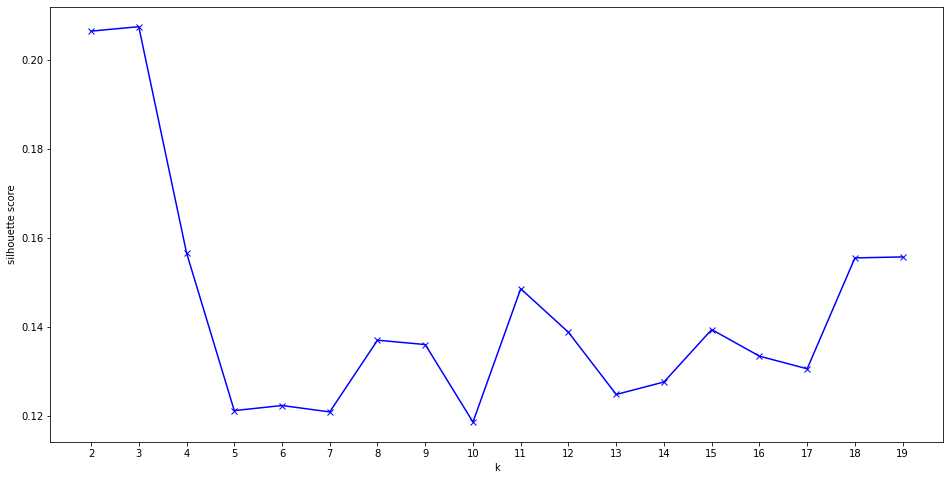

In [37]:
# applying silhouette to get perfect number of clusters

K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_to_scale)
    silhouette.append(silhouette_score(df_to_scale, kmeans.predict(df_to_scale)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [38]:
#applying the clustering

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_to_scale)

KMeans(n_clusters=5, random_state=42)

In [39]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_to_scale)
clusters

array([1, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3, 1, 0, 3, 3, 2, 1, 0, 3, 1, 3, 0,
       3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 1, 3, 0, 1, 0,
       3, 3, 1, 3, 1, 0, 1, 1, 2, 0, 2, 3, 2, 1, 0, 1, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 1, 3, 1, 3, 4, 0, 3, 2, 1, 0, 0, 0, 0, 3, 0, 1,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 0, 3, 0, 0, 0, 1, 3, 0, 2, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 0, 3, 4, 1, 1, 1, 1, 3, 2, 2,
       1, 1, 2, 3, 3, 1, 3, 0, 3, 3, 0, 4, 3, 3, 1, 1, 2, 4, 2, 2, 3, 4,
       1, 1, 1, 3, 3, 4, 3, 2, 3, 1, 3, 0, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 3, 1, 3, 1,
       0, 3, 2, 2, 3, 3, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 3, 2, 1, 0, 3,
       1, 3, 0, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 1, 2,
       2, 1, 1, 2, 3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 0,

In [40]:
#assigning the clusters to the main final df
scaled_df["clusters"] = clusters

In [41]:
scaled_df.groupby(['clusters'], as_index=False).count().sort_values(['clusters', 'key'], ascending=[True, False])[['clusters', 'key']]

,clusters,key
0,0,105
1,1,112
2,2,63
3,3,139
4,4,9


In [42]:
scaled_df = scaled_df.reset_index(drop=True)

In [50]:
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,duration_ms,time_signature,type,id,uri,track_href,analysis_url,song_name,artists,clusters
0,-1.311010,0.650788,0.074552,0.577899,-1.06271,-0.426648,0.117193,-0.145803,1.082730,0.767520,...,-0.202919,0.103081,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,As It Was,Harry Styles,1
1,1.660942,-0.187266,0.624695,0.248865,0.94099,0.092908,-0.953425,-0.156655,-0.525114,-0.895099,...,-0.007880,0.103081,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,First Class,Jack Harlow,3
2,0.549355,-0.376826,1.449910,-0.066958,0.94099,0.007624,0.448590,-0.156687,-0.694831,0.123132,...,1.895749,0.103081,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,Heat Waves,Glass Animals,3
3,1.792171,-0.745968,0.899767,-0.071912,0.94099,-0.364930,0.056324,-0.042854,-1.039949,0.703574,...,0.488096,0.103081,audio_features,36O90PhZmnMPk4FHDe2bPz,spotify:track:36O90PhZmnMPk4FHDe2bPz,https://api.spotify.com/v1/tracks/36O90PhZmnMP...,https://api.spotify.com/v1/audio-analysis/36O9...,Take Me Home,MOMO Soundz,3
4,0.811813,0.994988,-1.300806,0.172489,0.94099,-0.704941,-0.919608,-0.155974,-0.699704,2.105487,...,0.837052,0.103081,audio_features,6JIC3hbC28JZKZ8AlAqX8h,spotify:track:6JIC3hbC28JZKZ8AlAqX8h,https://api.spotify.com/v1/tracks/6JIC3hbC28JZ...,https://api.spotify.com/v1/audio-analysis/6JIC...,Cold Heart - PNAU Remix,Elton John,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1.190062,0.600903,-1.300806,0.854915,-1.06271,0.631540,-1.031438,-0.156637,-0.875917,-0.580284,...,0.930535,0.103081,audio_features,2Ngn0Gs7308cfRst4FFtAb,spotify:track:2Ngn0Gs7308cfRst4FFtAb,https://api.spotify.com/v1/tracks/2Ngn0Gs7308c...,https://api.spotify.com/v1/audio-analysis/2Ngn...,Best Friend (feat. Doja Cat & Katja Krasavice)...,Saweetie,3
424,1.884804,-0.865690,0.349624,0.471386,-1.06271,-0.052972,-0.806325,-0.156743,-0.776848,0.506814,...,-0.979668,0.103081,audio_features,3sZOiHgkXpDcilUBtHSixK,spotify:track:3sZOiHgkXpDcilUBtHSixK,https://api.spotify.com/v1/tracks/3sZOiHgkXpDc...,https://api.spotify.com/v1/audio-analysis/3sZO...,Raindrops,Katja Krasavice,3
425,-0.554513,-0.601304,0.899767,-1.402499,-1.06271,-0.655567,0.685303,-0.156116,-0.541355,-0.590122,...,-0.298046,0.103081,audio_features,2UD1csihq8aPrpM69C2XrW,spotify:track:2UD1csihq8aPrpM69C2XrW,https://api.spotify.com/v1/tracks/2UD1csihq8aP...,https://api.spotify.com/v1/audio-analysis/2UD1...,HIGHWAY (feat. ELIF),Katja Krasavice,0
426,0.356371,0.516100,-0.750663,-0.277094,-1.06271,-0.361563,-0.970671,-0.156760,-1.035889,1.908727,...,1.108991,0.103081,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,3


In [45]:
from random import randint
from time import sleep

In [63]:
# getting song and recomending song

song = input("enter a song name")

choice = charts.loc[lambda charts: charts['title'] == song]
print("You choose:", choice)

if len(choice) > 0:
    suggest = charts.sample()
    print("Maybe you can like another hot song:", suggest['title'])
    sleep(randint(1,3))
else:
    print("Not Found in hot songs, searching in our recomendations")
    choice2 = scaled_df.loc[(scaled_df['song_name'] == song)]
    if len(choice2) > 0:
        suggest = scaled_df.loc[scaled_df["clusters"]==choice2["clusters"].values[0]].sample()
        print("You could like this: ", suggest['song_name'].values[0],"by ", suggest['artists'].values[0])
        sleep(randint(1,3))
    else:
        print("Not avalible. Please try another song.")

You choose: Empty DataFrame
Columns: [artist, title]
Index: []
Not Found in hot songs, searching in our recomendations
You could like this:  Go There by  Tamer Nafar
